In [2]:
suppressPackageStartupMessages({
    source('../libs.R')
    source('../utils.R')    
    source('../Figures/colors.R')    
    source('../utils_mapping.R')
    source('../utils_plotting.R')
})


In [3]:
## Presto stats for reference
effects_ref_marginal <- readRDS('/data/srlab2/ik936/Roche/data/cache/obj_fibroblasts/effects_marginal.rds')
effects_ref_nested <- readRDS('/data/srlab2/ik936/Roche/data/cache/obj_fibroblasts/effects_nested.rds')


In [4]:
## all cells
obj <- readRDS('/data/srlab2/ik936/Roche/data/eczema/obj_all.rds')


In [5]:
## fibroblasts, mapped
fib <- readRDS('/data/srlab2/ik936/Roche/data/eczema/obj_fib.rds')


meta_hs <- readRDS('/data/srlab2/ik936/Roche/data/cache/obj_fibroblasts/meta_data.rds') %>% 
    dplyr::select(Cluster, Cluster_name) %>% 
    unique() %>% 
    dplyr::mutate(Cluster = paste0('C', Cluster))

fib$query$meta_data$Cluster_name <- NULL
fib$query$meta_data <- fib$query$meta_data %>% 
    left_join(meta_hs)

Joining, by = "Cluster"



In [6]:
pryr::object_size(obj)
pryr::object_size(fib)


Registered S3 method overwritten by 'pryr':
  method      from
  print.bytes Rcpp



1.12 GB

509 MB

# Violin (inflam score)

In [7]:
# fig.size(8, 5)
# p0 <- fib$meta_data %>% 
#     dplyr::select(LibraryID, tissue_type, InflamScore_beta) %>% 
#     unique() %>% 
#     dplyr::mutate(tissue_type = factor(tissue_type, c('Healthy', 'Non-lesional', 'Lesional'))) %>% 
#     ggplot(aes(reorder(LibraryID, InflamScore_beta), InflamScore_beta, fill = tissue_type)) + 
#         geom_bar(stat = 'identity') + 
#         coord_flip() + 
# #         scale_fill_tableau() + 
#         labs(
# #             x = '', 
#             y = 'Normalized Inflammation Score',
#             fill = 'Sample Type'
# #             title = tlabel
#         ) + 
#         scale_x_discrete(breaks = c('SRR11396175', 'SRR11396163', 'SRR11396167')) + 
#         theme(
#             legend.position = 'left',
#             axis.title.y = element_blank() 
#         ) + 
#         NULL

# p0


Joining, by = "LibraryID"

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


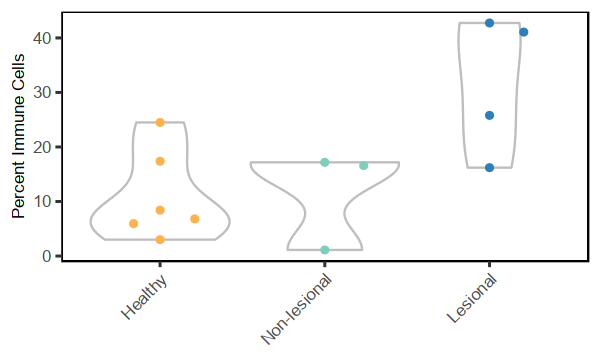

In [8]:
fig.size(3, 5)
p0 <- fib$meta_data %>% 
    dplyr::select(-matches('InflamScore|percent_cd45')) %>% 
    left_join(unique(dplyr::select(obj$meta_data, LibraryID, matches('percent_cd45'))))  %>% 
    dplyr::select(
        LibraryID, tissue_type, percent_cd45 
#         `Percent Immune Cells` = percent_cd45,
#         `Standardized Inflammation Score` = percent_cd45_beta
    ) %>% 
#     tidyr::gather(key, val, -LibraryID, -tissue_type) %>% 
    unique() %>% 
    dplyr::mutate(tissue_type = factor(tissue_type, c('Healthy', 'Non-lesional', 'Lesional'))) %>% 
    ggplot(aes(tissue_type, percent_cd45, color = tissue_type)) + 
        geom_violin(color = 'grey') + 
        geom_beeswarm(cex = 8, priority = 'descending') + 
        guides(color = FALSE) + 
        labs(
            y = 'Percent Immune Cells'
        ) + 
        theme(
            axis.title.x = element_blank(),
            axis.text.x = element_text(angle = 45, hjust = 1),
#             axis.text.x = element_blank(),
#             axis.ticks.x = element_blank(),
            plot.title = element_text(size = 12),
            axis.title.y = element_text(size = 10),
        ) + 
#         facet_grid(~tissue_type, space = 'free', scales = 'free') + 
        NULL
    
p0


# UMAP of types

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“Ignoring unknown parameters: width, height”


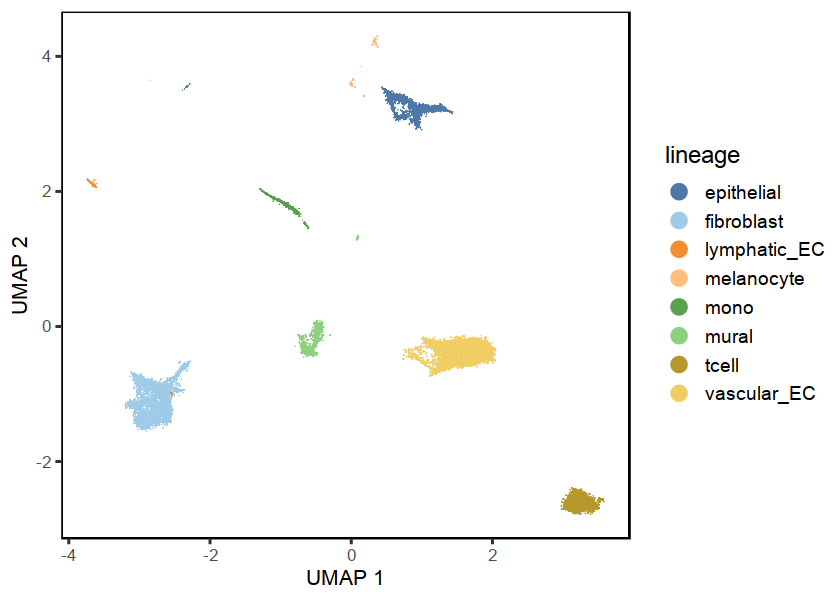

In [9]:
fig.size(5, 7)
p1 <- do_scatter(
    obj$umap_after, obj$meta_data, 'lineage',
    base_size = 14, pt_size = 5,
    do_raster = TRUE, w = 4, h = 3,
    do_labels = FALSE, no_guides = FALSE
)

p1 


In [10]:
# ggsave(
#     filename = '/data/srlab2/ik936/Roche/manuscript/figures/eczema/umap_all.pdf', 
#     units = 'in', device = 'pdf', 
#     height = 5, width = 7
# )


# Heatmap of lineage markers

In [11]:
mat <- obj$effects %>% 
    subset(feature %in% c('MLANA', 'KRT15', 'ACKR1', 'COL1A1', 'ACTA2', 'PROX1', 'CD3G', 'FCER1G', 'C1QB')) %>% 
#     dplyr::select(feature, Cluster, zscore) %>% 
#     tidyr::spread(Cluster, zscore) %>% 
    dplyr::select(feature, Cluster, beta) %>% 
    tidyr::spread(Cluster, beta) %>% 
    tibble::column_to_rownames('feature') %>% 
    as.matrix() 
    


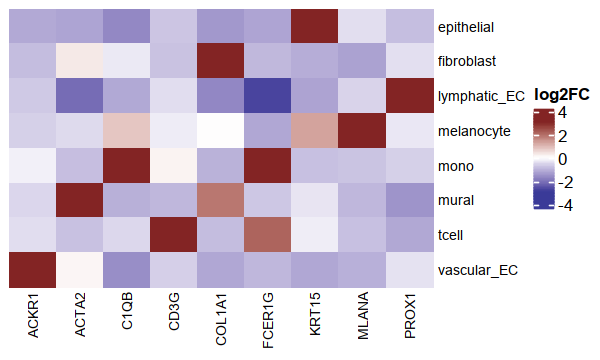

In [12]:
fig.size(3, 5)

ht_opt(RESET = TRUE)
ht_opt("heatmap_column_names_gp" = gpar(fontsize = 8))
ht_opt("heatmap_row_names_gp" = gpar(fontsize = 8))

h1 <- Heatmap(
    matrix = t(mat), 
    colorRamp2(c(-3, 0, 3), c(muted('blue'), 'white', muted('red'))),    
    column_names_rot = 90, 
    cluster_columns = FALSE, 
    cluster_rows = FALSE, 
    name = 'log2FC'
)

p2 <- grid.grabExpr(draw(h1))

h1


In [13]:
# pdf('/data/srlab2/ik936/Roche/manuscript/figures/eczema/all_cells_heatmap.pdf', width = 5, height = 3)
# h1 
# for (i in 1:1000) dev.off()


# symphony UMAP by tissue_type

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“Ignoring unknown parameters: width, height”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


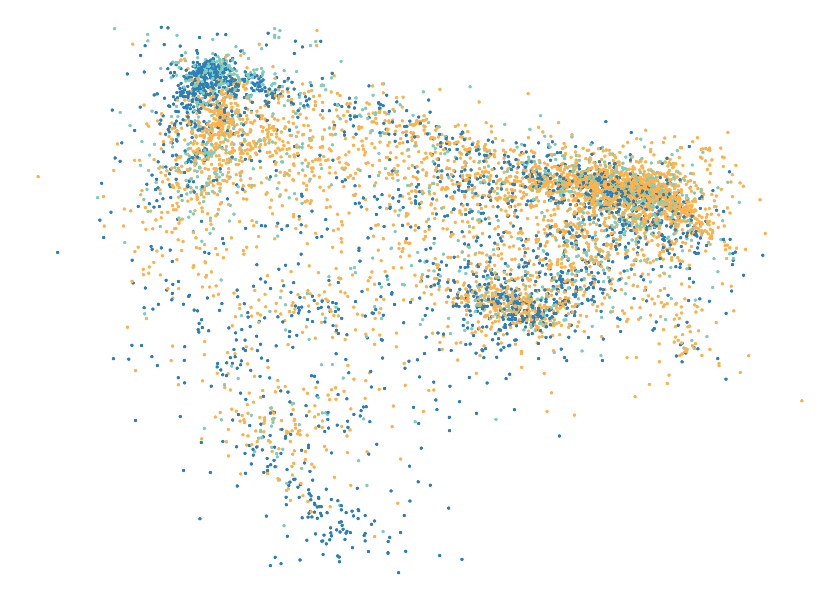

In [52]:
fig.size(5, 7)
idx <- which(!fib$query$meta_data$Cluster %in% paste0('C', c(6, 12, 13)))

p3 <- do_scatter(
    fib$query$U[idx, ], fib$query$meta_data[idx, ],
    'tissue_type',
#     quo(tissue_type), nrow = 3, 
    base_size = 14, pt_size = 5, 
    pt_shape = 16, point_size = .5,
    palette_use = palette_global, 
    do_raster = TRUE, h = 3, w = 4,
    do_labels = FALSE, no_guides = TRUE
#     , no_guides = FALSE
) + 
    scale_y_continuous(breaks = c(-0.5, 0, 0.5)) +
    scale_x_continuous(breaks = c(-0.5, 0, 0.5)) +
    theme_void() + 
    theme(legend.position = 'left')

p3


In [15]:
# ggsave(
#     filename = '/data/srlab2/ik936/Roche/manuscript/figures/eczema/umap_types_mappedd.pdf', 
#     units = 'in', device = 'pdf', 
#     height = 5, width = 7
# )


# symphony UMAP by inferred Cluster 

In [16]:
# ## Clusters with poor representation
# idx <- which(!fib$query$meta_data$Cluster %in% paste0('C', c(6, 12, 13)))

# fig.size(5, 7)
# p4 <- do_scatter(
#     fib$query$U[idx, ], fib$query$meta_data[idx, ], 'Cluster_name',
#     base_size = 14, pt_size = 3, 
#     pt_shape = 16, point_size = .5, 
#     palette_use = palette_global,     
#     do_raster = TRUE, h = 3, w = 4,
#     do_labels = FALSE, no_guides = FALSE
# ) + 
#     labs(color = '', fill = '') + 
#     scale_y_continuous(breaks = c(-0.5, 0, 0.5)) +
#     scale_x_continuous(breaks = c(-0.5, 0, 0.5)) +
#     NULL

# p4


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“Ignoring unknown parameters: segment.size”
Warning message:
“Ignoring unknown parameters: label.size, segment.size”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


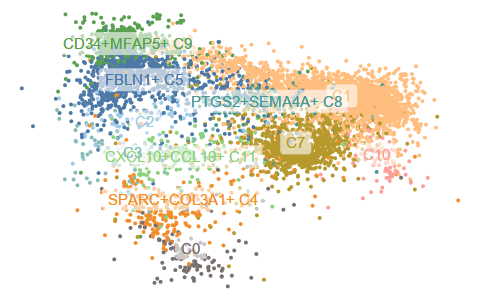

In [54]:
## Clusters with poor representation
idx <- which(!fib$query$meta_data$Cluster %in% paste0('C', c(6, 12, 13)))

fig.size(2.5, 4) ## Realistic panel size
p4 <- do_scatter(
    fib$query$U[idx, ], fib$query$meta_data[idx, ], 'Cluster_name',
    base_size = 14, pt_size = 3, 
    pt_shape = 16, point_size = .5, 
    palette_use = palette_global[unique(fib$query$meta_data$Cluster_name)],     
#     do_labels = FALSE, no_guides = FALSE
#     do_raster = TRUE, h = 5, w = 5
) + 
    labs(color = '', fill = '') + 
    scale_y_continuous(breaks = c(-0.5, 0, 0.5)) +
    scale_x_continuous(breaks = c(-0.5, 0, 0.5)) +
    theme(
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank(),
        axis.title.y = element_blank() ,
        legend.text = element_text(size = 6)
    ) + 
    theme_void() + 
    NULL

p4


In [18]:
# ggsave(
#     filename = '/data/srlab2/ik936/Roche/manuscript/figures/eczema/umap_mapped_clusters.pdf', 
#     units = 'in', device = 'pdf', 
#     height = 5, width = 7
# )


# Per-donor cluster proportions

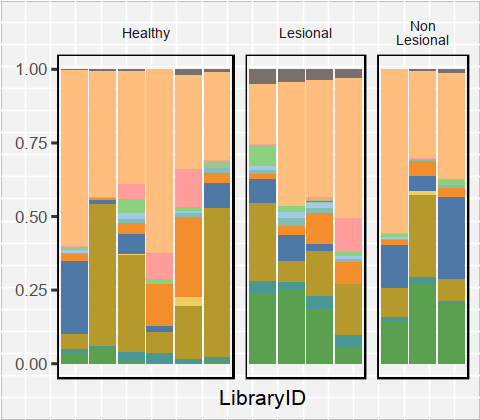

In [19]:
fig.size(3.5, 4)
p4a <- fib$query$meta_data %>% 
    with(table(LibraryID, Cluster, tissue_type)) %>% 
    data.table() %>% 
    subset(N > 0) %>% 
    dplyr::mutate(tissue_type = case_when(
        tissue_type == 'Non-lesional' ~ 'Non\nLesional',
        TRUE ~ tissue_type
    )) %>%  
    ggplot(aes(LibraryID, N, fill = Cluster)) + 
        geom_bar(stat = 'identity', position = position_fill()) + 
#         scale_fill_tableau('Tableau 20') + 
#         scale_fill_manual(values = palette_global) + 
#         coord_flip() + 
        facet_grid(~tissue_type, scales = 'free', space = 'free') + 
        guides(fill = 'none') + 
        labs(y = 'Ratio of fibroblasts') + 
        theme(
            legend.position = 'bottom',
            axis.title.y = element_blank(), 
#             axis.text.x = element_text(angle = 45, hjust = 1)
            axis.text.x = element_blank(),
            axis.ticks.x = element_blank(),
            strip.text = element_text(size = 8)
        ) + 
        scale_fill_manual(values = palette_global[unique(fib$query$meta_data$Cluster)]) + 
        NULL

p4a <- remove_strip_box(p4a)
plot(p4a)


# marginal conservation heatmap

In [20]:
df_dermal <- fib$query$effects %>% 
    dplyr::select(Cluster, zscore, feature) %>% 
    dplyr::mutate(Cluster = gsub('C', 'dermal_', Cluster)) %>% 
    tidyr::spread(Cluster, zscore) %>% 
    tibble::column_to_rownames('feature')

## Compare to marginal effects
df_ref <- effects_ref_marginal %>% 
    subset(!Cluster %in% c(6, 12, 13)) %>% ## absent in dermal mapping 
    dplyr::select(Cluster, zscore, feature) %>% 
    dplyr::mutate(Cluster = paste0('ref_', Cluster)) %>% 
    tidyr::spread(Cluster, zscore) %>% 
    tibble::column_to_rownames('feature')

genes_use <- intersect(rownames(df_dermal), rownames(df_ref))

cormat <- cor(df_dermal[genes_use, ], df_ref[genes_use, ])
o_row <- order(as.integer(gsub('.*?(\\d+)', '\\1', rownames(cormat))))
o_column <- order(as.integer(gsub('.*?(\\d+)', '\\1', colnames(cormat))))
cormat <- cormat[o_row, o_column]


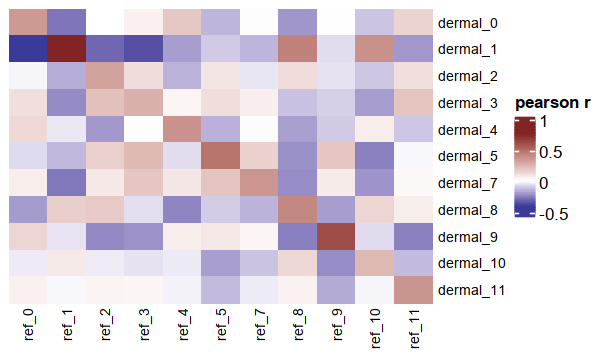

In [21]:
fig.size(3, 5)
ht_opt(RESET = TRUE)
ht_opt("heatmap_column_names_gp" = gpar(fontsize = 8))
ht_opt("heatmap_row_names_gp" = gpar(fontsize = 8))

h2 <- Heatmap(
    cormat,
    name = 'pearson r',
    cluster_rows = FALSE, 
    cluster_columns = FALSE,
#     colorRamp2(c(min(cormat), 0, max(cormat)), c('white', 'white', muted('red'))),
    colorRamp2(c(min(cormat), 0, max(cormat)), c(muted('blue'), 'white', muted('red'))),
    column_names_rot = 90, 
)
p5 <- grid.grabExpr(draw(h2))
h2


In [22]:
# pdf('/data/srlab2/ik936/Roche/manuscript/figures/eczema/conservation_heatmap.pdf', width = 5, height = 3)
# h2
# for (i in 1:100) dev.off()


# Key markers heatmap 

For C4 and C11, main markers scatter. 


In [23]:
plt_df <- data.table(inner_join(
    fib$query$effects,
    effects_ref_marginal %>% dplyr::mutate(Cluster = paste0('C', Cluster)),
    by = c('feature', 'Cluster'),
    suffix = c('_dermal', '_ref') 
)) %>% 
    subset(Cluster %in% c('C4', 'C11'))

genes_df <- effects_ref_marginal %>% 
    subset(Cluster %in% c('4', '11')) %>% 
    split(.$Cluster) %>% 
    map(arrange, -zscore) %>% 
    map(head, 10) %>% 
    bind_rows() %>% 
    dplyr::mutate(Cluster = paste0('C', Cluster)) %>% 
    left_join(
        fib$query$effects,
        by = c('feature', 'Cluster'),
        suffix = c('_ref', '_dermal') 
    ) %>% 
    rbind(
        subset(plt_df, Cluster == 'C4' & feature %in% c('SPARC'))
    ) %>% 
    left_join(meta_hs)

head(genes_df)


Joining, by = "Cluster"



contrast_ref,feature,beta_ref,sigma_ref,zscore_ref,pvalue_ref,Cluster,contrast_dermal,beta_dermal,sigma_dermal,zscore_dermal,pvalue_dermal,Cluster_name
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
11,CCL19,4.866968,0.6387375,7.619669,1.271637e-14,C11,C11,3.5984587,0.8407070,4.280277,1.866611e-05,CXCL10+CCL19+ C11
11,CXCL10,4.535924,0.6722624,6.747252,7.533556e-12,C11,C11,5.2829343,1.9304263,2.736667,6.206505e-03,CXCL10+CCL19+ C11
11,RBP5,1.932751,0.3449129,5.603591,1.049779e-08,C11,C11,1.9229618,0.3506189,5.484479,4.146900e-08,CXCL10+CCL19+ C11
11,HLA-DRA,1.514271,0.2776734,5.453425,2.470439e-08,C11,C11,0.5058029,0.2541665,1.990046,4.658592e-02,CXCL10+CCL19+ C11
11,CD74,1.351965,0.2572648,5.255150,7.395191e-08,C11,C11,0.9573621,0.2229323,4.294408,1.751600e-05,CXCL10+CCL19+ C11
11,HLA-DRB1,1.372840,0.2742439,5.005909,2.779952e-07,C11,C11,0.6027986,0.2848974,2.115845,3.435803e-02,CXCL10+CCL19+ C11


Joining, by = "Cluster"

Warning message:
“Ignoring unknown parameters: width, height”
Warning message:
“Ignoring unknown parameters: point_padding”
Warning message:
“Removed 2 rows containing missing values (geom_text_repel).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message:
“ggrepel: 5 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


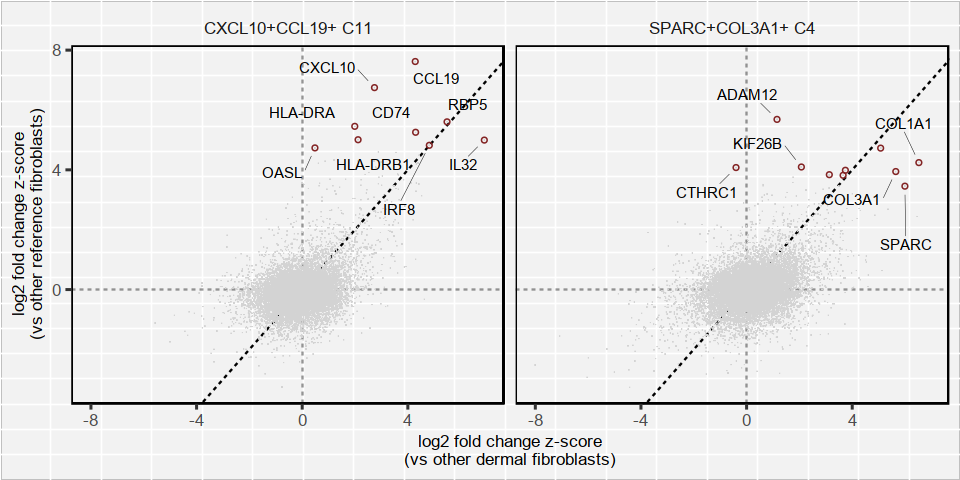

In [24]:
fig.size(4, 8)
p6 <- plt_df %>% 
    left_join(meta_hs) %>% 
#     ggplot(aes(beta_dermal, beta_ref)) + 
    ggplot(aes(zscore_dermal, zscore_ref)) + 
        geom_abline(linetype = 2) + 
        geom_vline(xintercept = 0, linetype = 2, alpha = 0.4) + 
        geom_hline(yintercept = 0, linetype = 2, alpha = 0.4) + 
        geom_point_rast(shape = '.', color = 'lightgrey', width = 4, height = 3) + 
#         geom_point(shape = 21, size = .5, color = 'lightgrey') + 
        geom_text_repel(
            data = genes_df, 
            aes(label = feature),
            size = 3,
            point_padding = .7,
            box.padding = .7,
            point.padding = .7,
            segment.size = .1
#             color = muted('red')
        ) + 
        geom_point(
            data = genes_df, 
            shape = 21, size = 1, color = muted('red')
        ) + 
        facet_wrap(~Cluster_name, ncol = 2) + 
        labs(
            x = 'log2 fold change z-score\n(vs other dermal fibroblasts)', 
            y = 'log2 fold change z-score\n(vs other reference fibroblasts)'
        ) + 
        theme(
            axis.title = element_text(size = 10),
            plot.title = element_text(size = 10),
            strip.text = element_text(size = 10)
        ) + 
        NULL

p6 <- remove_strip_box(p6)
plot(p6)

In [25]:
# ggsave(
#     filename = '/data/srlab2/ik936/Roche/manuscript/figures/eczema/scatter_c4_c11.pdf', 
#     units = 'in', device = 'pdf', 
#     height = 4, width = 8
# )


# MASC forest plot

Joining, by = "Cluster"

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


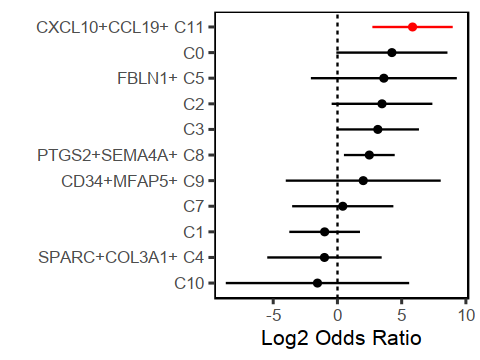

In [26]:
fig.size(3, 4)
# p7 <- fib$query$masc %>% 
p7 <- fib$masc %>% 
    left_join(meta_hs) %>% 
    dplyr::mutate(Cluster = Cluster_name) %>% 
#     subset(!Cluster %in% paste0('C', c(6, 12, 13))) %>% 
    subset(!grepl('C6$|C12$|C13$', Cluster)) %>% 
    forest_uni(sigma_max = Inf, fdr_max = 0.05) + 
    labs(y = 'Log2 Odds Ratio') + 
#     scale_x_discrete(position = 'top') + 
    NULL

p7


In [27]:
# fib$query$masc

In [28]:
# ggsave(
#     filename = '/data/srlab2/ik936/Roche/manuscript/figures/eczema/masc_forest.pdf', 
#     units = 'in', device = 'pdf', 
#     height = 3, width = 4
# )


# Vascular proportions

Joining, by = "LibraryID"

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


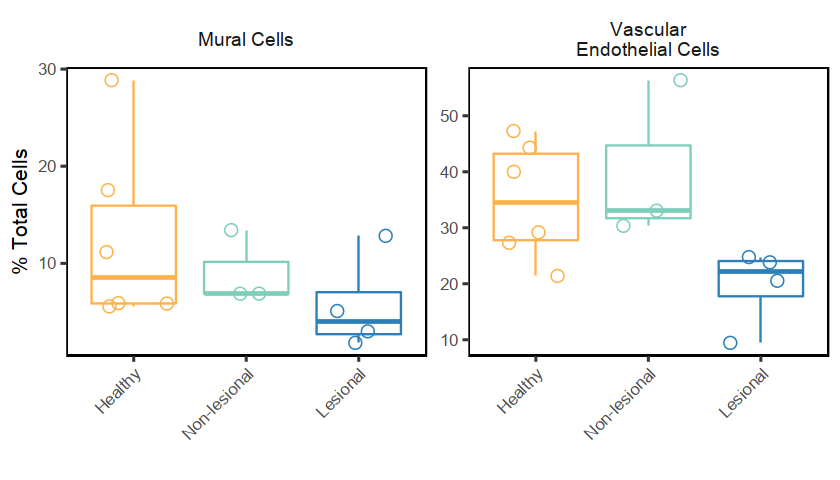

In [29]:
fig.size(4, 7)
p8 <- obj$meta_data %>% 
    with(prop.table(table(lineage, LibraryID), 2)) %>% 
    data.table() %>% 
    inner_join(
        obj$meta_data %>% 
            dplyr::select(LibraryID, disease, tissue_type) %>% 
            unique()
    ) %>% 
    subset(lineage %in% c('vascular_EC', 'mural')) %>% 
    dplyr::mutate(lineage = case_when(
        lineage == 'mural' ~ 'Mural Cells',
        lineage == 'vascular_EC' ~ 'Vascular\nEndothelial Cells'
    )) %>% 
    dplyr::mutate(tissue_type = factor(tissue_type, c('Healthy', 'Non-lesional', 'Lesional'))) %>% 
    ggplot(aes(tissue_type, 100 * N, color = tissue_type)) +
        geom_boxplot(outlier.shape = NA) + 
        geom_jitter(height = 0, width = .3, size = 3, shape = 21) + 
        facet_wrap(~lineage, scales = 'free_y', nrow = 1) + 
        labs(x = '', y = '% Total Cells') + 
        theme(axis.text.x = element_text(angle = 45, hjust = 1)) + 
        guides(color = FALSE) + 
        NULL

p8


In [30]:
df <- obj$meta_data %>% 
    with(prop.table(table(lineage, LibraryID), 2)) %>% 
    data.table() %>% 
    inner_join(
        obj$meta_data %>% 
            dplyr::select(LibraryID, disease, tissue_type) %>% 
            unique()
    ) %>% 
    subset(lineage %in% c('vascular_EC', 'mural')) %>% 
    dplyr::mutate(lineage = case_when(
        lineage == 'mural' ~ 'Mural Cells',
        lineage == 'vascular_EC' ~ 'Vascular\nEndothelial Cells'
    )) 


Joining, by = "LibraryID"



In [31]:
df %>% 
    split(.$lineage) %>% 
    map(function(.SD) {
#         broom::tidy(lm(N ~ tissue_type == 'Lesional', .SD))
        t.test(
            data.table(.SD)[tissue_type == 'Lesional', N],
            data.table(.SD)[tissue_type != 'Lesional', N]
        ) %>% broom::tidy()
    }) %>% 
    bind_rows(.id = 'Type')


Type,estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Mural Cells,-0.05653954,0.05685973,0.1133993,-1.578318,0.148680295,9.072249,-0.1374777,0.02439865,Welch Two Sample t-test,two.sided
Vascular Endothelial Cells,-0.16940077,0.19643129,0.3658321,-3.305851,0.008905041,9.176813,-0.2849803,-0.05382126,Welch Two Sample t-test,two.sided


# Vascular MASC 

In [32]:
plt_df <- list(
    `Mural Cells` = fib$query$masc_mural,
    `Vascular\nEndothelial Cells` = fib$query$masc_ec
) %>% 
    bind_rows(.id = 'Type') %>% 
    left_join(meta_hs) %>% 
    dplyr::mutate(Cluster = Cluster_name) %>% 
    subset(abs(zscore) < 10) %>% 
    subset(!grepl('C6$|C12$|C13$', Cluster)) 

plt_df$fdr <- p.adjust(plt_df$pvalue, 'BH')


Joining, by = "Cluster"



Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


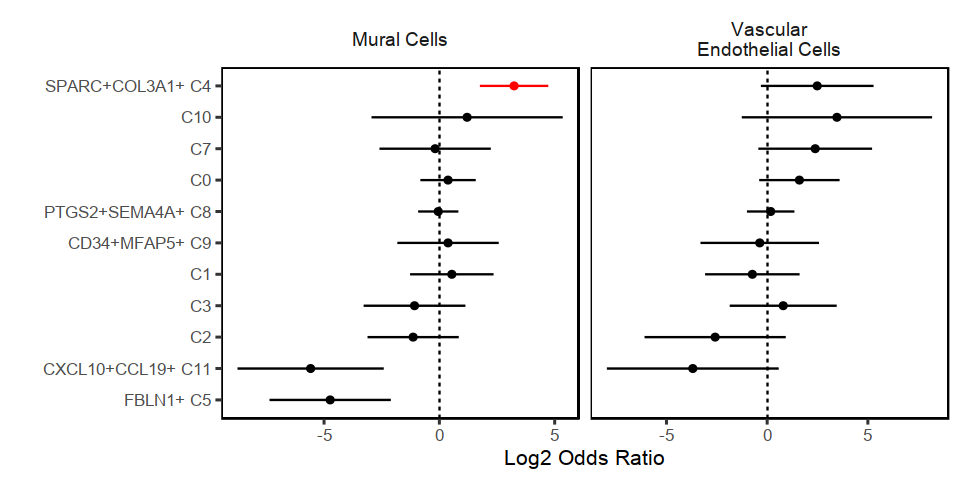

In [33]:
fig.size(4, 8)
p9 <- plt_df %>%     
    forest_uni(sigma_max = Inf, fdr_max = 0.1) + 
#         scale_x_discrete(position = 'top') + 
        facet_wrap(~Type, ncol = 2, scales = 'free_x') + 
        labs(y = 'Log2 Odds Ratio')

p9


# Cartoon

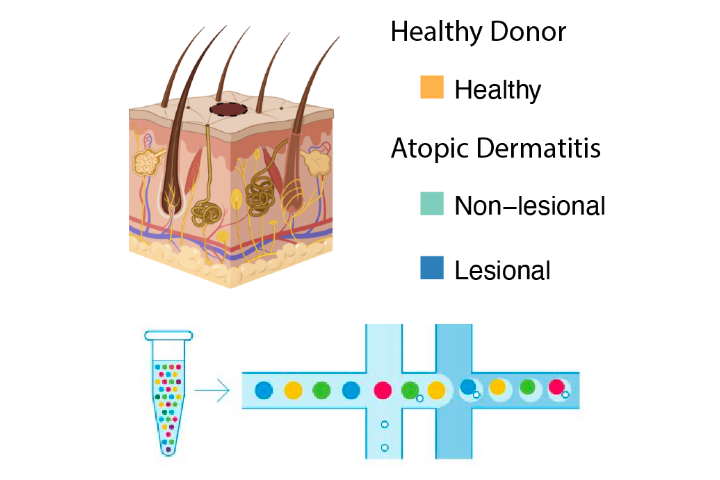

In [40]:
library(png)
g0 <- readPNG('/data/srlab2/ik936/Roche/manuscript/figures/cartoon_skin.png') %>% 
    rasterGrob(interpolate = TRUE)

fig.size(4, 6)
wrap_elements(g0)

# Arrange panels

Warning message:
“ggrepel: 8 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 10 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


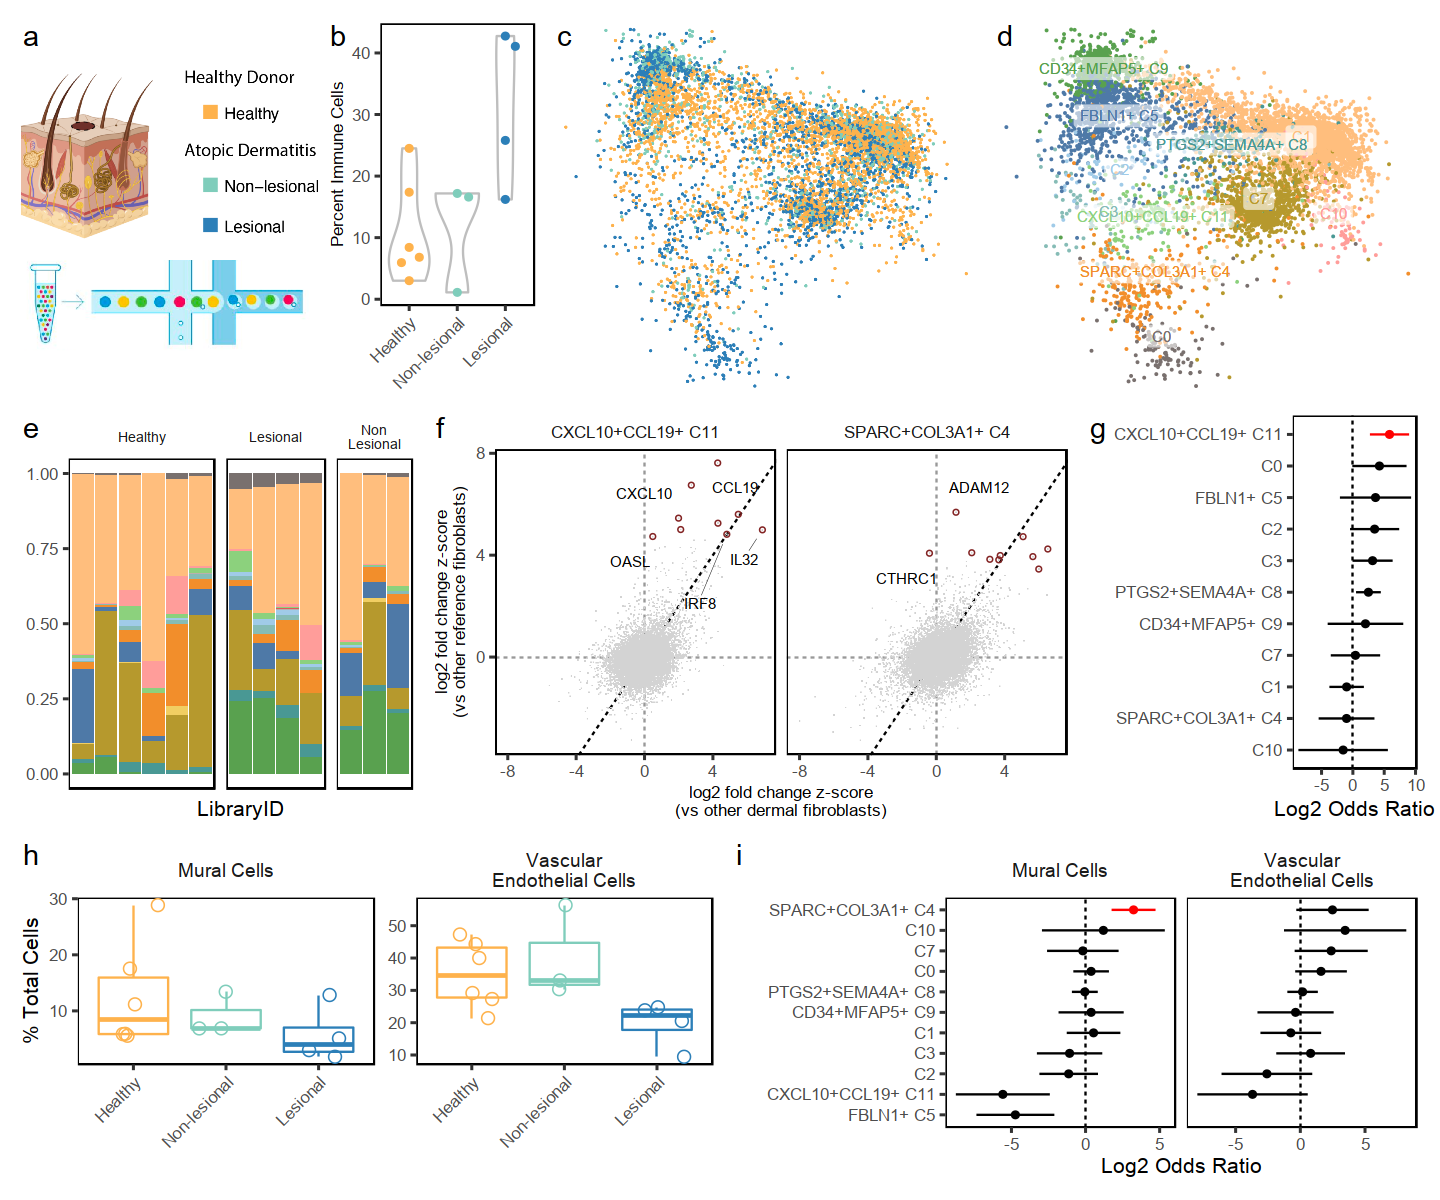

In [57]:
fig.size(10, 12)
fig <- (
    ## Row 1
    (wrap_elements(full = g0) | wrap_elements(full = p0) | wrap_elements(full = p3) | wrap_elements(full = p4)) +
#     (wrap_elements(grid::textGrob('Cartoon')) | p0 | p3 | p4) +
    plot_layout(widths = c(1, .7, 1.5, 1.5)) 
) / 
(
    ## Row 2
#     p4 + wrap_elements(p5) + p6 +
#     plot_layout(widths = c(1, 1.5, 2)) + 
    (wrap_elements(full = p4a) | wrap_elements(full = p6) | wrap_elements(full = p7)) + 
    plot_layout(widths = c(1.2, 2, 1)) + 
    NULL
) / 
(
    ## Row 3
    (wrap_elements(full = p8) | wrap_elements(full = p9)) + 
    plot_layout(widths = c(1, 1)) + 
    NULL
) + 
    plot_layout(heights = c(2, 2.2, 1.8)) + 
    plot_annotation(tag_levels = 'a')


fig

In [58]:
ggsave(
    filename = '/data/srlab2/ik936/Roche/manuscript/figures/Figure7.pdf', 
    plot = fig, 
    units = 'in', device = 'pdf', 
    height = 10, width = 12,
    useDingbats = FALSE
)


Warning message:
“ggrepel: 4 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 8 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
